# Getting started with scikit-learn

scikit-learn is a Python library for machine learning.
This library hides a lot of implementation details and helps us get started creating models with just a few lines of code.
In fact, it even comes with a few sample datasets so we can experiment easily.

The scikit-learn library is based on [SciPy](https://www.scipy.org/), another set of libraries that facilitate working with data science using Python.
Although working with scikit-learn is generally _very_ easy, you also need to work a little with these libraries.
For example, to train models, we usually have to load datasets into NumPy arrays.
Therefore it's helpful to know how some of SciPy's libraries work, namely:

- [pandas](https://pandas.pydata.org/): A library to view and manipulate data using DataFrames (tables of data), which includes functionality to read datasets from files, sort and filter data, and much more.
- [NumPy](https://numpy.org/): An easy to use library for numbers, which makes it easier to work with N-dimensional (2D, 3D, ...) arrays, and provides other mathematical functions, such as to generate series of numbers.
- [Matplotlib](https://matplotlib.org/): A visualization library to create illustrations with a few lines of code.

Before delving into scikit-learn, this notebook will first take a look at these three libraries.
All three of them are very powerful, and you're likely to use them together to solve a bigger problem (such as training a machine learning model).
Therefore instead of learning how to use all of them expertly, **it's better to know the basics and search in the documentation or on Google for more advanced usage**. Check the resources section at the end of this notebook for links to the documentation.

# pandas

If you're working with datasets, odds are you'll also be working with pandas.
pandas is a library that helps you load datasets, manipulate them and convert them to other formats for sci-kit learn.

The next code cell loads the Titanic dataset from a CSV file and shows the first 10 rows.

> Note: Jupyter Notebook considers the last line of code as output and dispalys the return value just below the cell.

In [1]:
import pandas as pd # import pandas: we normally refer to the library using `pd`
df = pd.read_csv('data/titanic-train.csv') # load the data into a DataFrame (`df` in short)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


There are other ways of loading showing data or getting a subset.
For example, the next code cell keeps all rows, but only a few columns.

In [2]:
_df = df.copy() # create a copy
_df = _df[[ 'Name', 'Sex', 'Age', 'Fare', 'Embarked' ]] # keep only a few columns: note the [[double bracket syntax]]
_df.iloc[:10] # equivalent to df.head(10), gets the first 10 rows

,Name,Sex,Age,Fare,Embarked
0,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,"Allen, Mr. William Henry",male,35.0,8.0500,S
5,"Moran, Mr. James",male,NaN,8.4583,Q
6,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S
7,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C


Do you see the first column, in bold?
That's the index, which can also be strings instead of numbers, the default value.
To get rows by index, we can use `loc` instead of `iloc`.

In [3]:
df.loc[0:10] # get the rows that have an index between 0 and 9

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Do you see that `NaN` (Not a Number) value at index 5?
Luckily for us, pandas helps us either remove the row, or fill missing ages with a custom value.

> Note: There are two ways ofreferring to columns.
        The first way is by using square brackets (`df['Age']`), and the second is by accessing the propert (`df.Age`).

In [4]:
# if you want to remove rows with missing data, uncomment the next line
# df = df.dropna()

# if you want to replace the missing value with the average
average = df['Age'].mean() # calculate the average
df.Age = df.Age.fillna(average) # fill missing Age values with the average we calculated above

df.head(10) # again, show the first 10 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


There are other functions that help you manipulate the data.
The next cell sorts the dataframe by age in descending order and prints the 10 oldest passengers.

In [5]:
_df = df.sort_values(by='Age', ascending=False)
_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


We can also group data to get aggregate information based on groups.

In [6]:
df.groupby(by=[ 'Embarked' ]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.480855,0.571429,0.413043,27.079812


There's more—much more—to discover about pandas, but we'll see more of it in the next notebooks.
If you're looking for something in particular, there's a link to the documentation in the resources at the end of this notebook.

# NumPy

NumPy might not be as flashy as pandas, but it helps us save _a lot_ of time.
If you loaded a dataset in pandas, you can convert it to a NumPy array using the `to_numpy` method.
That means you can combine different libraries together to work more efficiently.

In [7]:
_df = df.copy()
_df = df[[ 'Name', 'Sex', 'Age', 'Fare', 'Embarked' ]] # keep only a few columns: note the [[double bracket syntax]]
np_df = _df.to_numpy() # convert our Titanic dataset to a NumPy array

One of the most useful features of NumPy is how it makes it easy to generate data.
There are a few functions you can use, and the next cell shows a selection.

In [8]:
import numpy as np # import NumPy: we normally refer to the library using `np`
l1 = np.linspace(10, 20, 5) # generate 5 numbers between 10 and 20 ([10.  12.5 15.  17.5 20. ])
l2 = np.arange(10, 20, 2) # generate numbers between 10 and 20 with a step of 2 ([10 12 14 16 18])

# generate 10 numbers using the normal (or Gaussian) distribution
# the distribution has a a mean (central tendency) of 5 and a standard deviation (measures of dispersion) of 2
np.random.normal(5, 2, 10) # mean: 5; standard deviation: 2; generate 10 numbers

array([4.89052534, 1.85601397, 6.12298651, 4.52080236, 4.13406417,
       4.7139491 , 3.71901201, 4.48836593, 2.40542976, 4.39065336])

When we have an array like that, we can get information about it using the `shape` property.
As the name implies, it gives us the shape of the data: how many elements there are in a normal list, or how many rows and columns there are in a 2D array.
For example, the next cell tells us that our modified dataset, which we converted to a NumPy array above, has 891 rows and 5 columns.

> Note: NumPy arrays can have a higher dimension than 2D, but we're keeping it simple here.

In [9]:
np_df.shape

(891, 5)

Like pandas, NumPy is also helpful because it lets us manipualte the data.
The next code cell shows one easy way of getting a subset of rows, a subset of columns, and a combination of the two.

In [10]:
np_df[10:20] # get rows 11-20 (remember: arrays start from index 0!) with all columns
np_df[:, 3:5] # get all rows, but keeping only columns 4 and 5 (again, arrays start from index 0)
np_df[10:15, 3:5] # get rows 11-15 and retain only columns 4 and 5

array([[16.7, 'S'],
       [26.55, 'S'],
       [8.05, 'S'],
       [31.275, 'S'],
       [7.8542, 'S']], dtype=object)

NumPy can get more complicated, which is good news; there's more to learn, but you can also save more time by learning.
The next cell shows you how to keep whichever columns you need.

In [11]:
np_df[:5, [ 0, 2 ]] # keep the first 5 rows, and retain only columns 1 and 3 (the name and age of each passenger)

array([['Braund, Mr. Owen Harris', 22.0],
       ['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 38.0],
       ['Heikkinen, Miss. Laina', 26.0],
       ['Futrelle, Mrs. Jacques Heath (Lily May Peel)', 35.0],
       ['Allen, Mr. William Henry', 35.0]], dtype=object)

We'll see more from NumPy in the next notebooks, but the essence of it is: use NumPy smartly to save time working with arrays.

# Matplotlib

Unlike pandas and NumPy, you can probably get away with not knowing Matplotlib when using scikit-learn.
However, it's a valuable tool to help you understand (or debug 😒) how a model is working, or share conclusions with visualizations.

The great thing about Jupyter Notebook is that we can view our visualizations _right in our notebook!_
The next visualization shows a bunch of scatter points generated using NumPy with just a single line of code, and then visualized using Matplotlib.

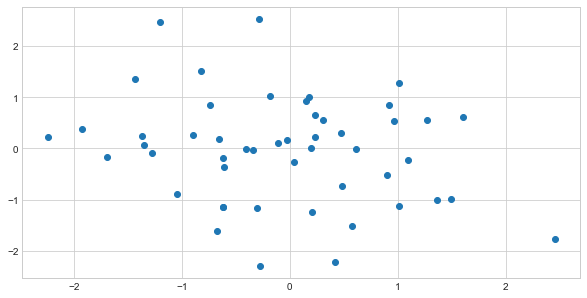

In [12]:
import matplotlib.pyplot as plt # import matplotlib's plotting function
plt.style.use('seaborn-whitegrid') # change the style because no one likes an ugly visualization

# prepare some data
x = np.random.randn(50) # 50 points, randomly-sampled from the normal distribution (mean=1, standard deviation=1)
y = np.random.randn(50) # 50 points, randomly-sampled from the normal distribution (mean=1, standard deviation=1)

# draw the visualization
plt.figure(figsize=(10, 5)) # create a figure with a custom size
plt.scatter(x, y) # draw a scatter plot (literally, scattered points)
plt.show() # show the plot

Matplotlib is _very_ powerful.
The next code cell shows a line instead of a scatter plot.
We also pass extra parameters to customize what the line looks like.

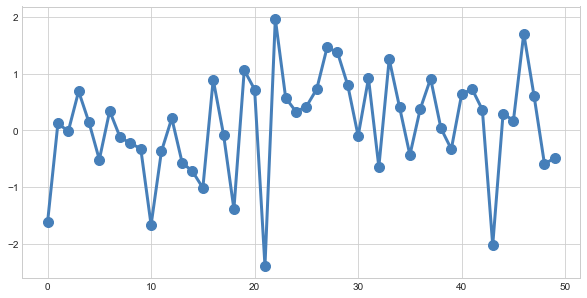

In [13]:
# remember, there's no need to import matplotlib again, nor set the style
# we already did both in the previous code block

# prepare some data
x = np.arange(0, 50) # 50 points between 0 and 10
y = np.random.randn(50) # 50 points, randomly-sampled from the normal distribution (mean=1, standard deviation=1)

# draw the visualization
plt.figure(figsize=(10, 5)) # create a figure with a custom size
plt.plot(x, y, marker='o', markersize=10, color='#467FB9', linewidth=3) # similar syntax to a scatter plot, but this time it's a line
plt.show() # show the plot

There's much, _much_ more that you can do with Matplotlib.
Luckily, Matplotlib (and the other libraries) are widely-used and have comprehensive documentation, so you can Google what you need when you need to.

But for now, it's time for scikit-learn.

## Working with scikit-learn's models

Generally, when working with scikit-learn, you will start with these three steps:

1. Read the data from a dataset, possibly modifying it in some way
2. Create a model and train it using the algorithm's `fit` method
3. Predict the class (or cluster) of new instances using the algorithm's `predict` method.

You will likely spend most time pre-processing the data (step 1) and experimenting with the hyperparameters (step 2) because scikit-learn takes care of the training and predictions on its own.
The fourth step is evaluating the performance of the model, which we will see in later notebooks.

### 1. Loading datasets

scikit-learn comes pre-packaged with [a few standard datasets](https://scikit-learn.org/stable/datasets.html#datasets), which you can load from the `sklearn.datasets` module.
By scikit-learn's conventions, datasets have two important components:

- `X`: the instances (rows) in the dataset, but including only the features
- `y`: the labels for each instance in the dataset

Naturally, the number of `X` (instances) and `y` must be equal.

In the next cell, we load a standard toy dataset: the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).
This dataset is made up of 150 flowers split into 3 types.
Each flower has a label (the type of flower: Iris Setosa, Iris Versicolour or Iris Virginica) and 4 features:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

The dataset features (`X`) is a 2D NumPy array.
Each row is an instance and all rows are made up of 4 columns (the features above).
The `shape` property gives us the number of rows and features.

In [14]:
from sklearn import datasets # import the datasets module from scikit-learn
X, y = datasets.load_iris(return_X_y=True) # import the Iris dataset: the features (`X`) and the labels (`y`)
X.shape # (150 rows, 4 columns)

(150, 4)

To view the first _n_ rows, we can use list subsets.

In [15]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 2. Training models

To train a model, we need to import the classifier and create it with any hyperparameters.
After creating it, all we have to do is fit the model over our data: the features `X` and the labels `y`.

> Tip: You can view a list of available classifiers [here](https://scikit-learn.org/stable/modules/classes.html).

In [16]:
from sklearn.neighbors import KNeighborsClassifier # import the classifier
knn = KNeighborsClassifier(n_neighbors=5) # hyperparameter: the number of neighbors to consider (5)
knn.fit(X, y) # fit, or train, the model

KNeighborsClassifier()

### 3. Making predictions with our models

After fitting the model, we can make predictions using the `predict` method.
The function expects one or more instances, and it predicts one label for each.

All instances must have the same number of features as the data we used to fit the model.
Since `X` had 4 features, the instances we will predict must have 4 features too.

> Note: In the next two code cells, we use NumPy-like arrays, which are lists inside another list.
        Each inner list is a row (we only have one, but we could have had more).
        These rows are made up of 4 features (in the following example, the features are 6, 3, 2.6 and 0.1).

In [17]:
knn.predict([
    [ 6, 3, 2.6, 0.1 ],
    [ 6, 3, 3.8, 0.1 ]
]) # predict the label for a flower that has features 6, 3, 2.6 and 0.1

array([0, 1])

Instead of `predict`, we can also call the `predict_proba` method on the classifier.
This method gives us the probability that the new instance belongs to each class.
Naturally, the probability sums up to 1.

In [18]:
knn.predict_proba([[ 6, 3, 2.6, 0.1 ]]) # get the probability that this flower belongs in each class

array([[0.8, 0.2, 0. ]])

## Clustering

Clustering algorithms work very much in the same way.
We have to load the dataset and fit the model to find its parameters.

This is the Iris dataset we loaded before, but showing only two dimensions.

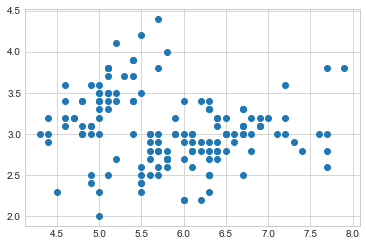

In [19]:
# visualize the data we have so far
import matplotlib.pyplot as plt # import matplotlib (we'll see more about this in the next notebook)
plt.style.use('seaborn-whitegrid') # change the style because no one likes an ugly visualization
plt.scatter(X[:, [ 0 ]], X[:, [ 1 ]], color='C0') # draw the points
plt.show() # show the visualization

We can import clustering algorithms as usual.
Note two things:

1. We set the hyperparameters when creating the model.
2. After training or fitting the model over our data, the parameters and other things that the model learned are stored as properties (such as `kmeans.labels_` or `kmeans.cluster_centers_`).
   The property names change from one model to the other; [check the API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to see a list of available properties.

In [20]:
# step 2: train the K-Means clustering model

from sklearn.cluster import KMeans # import the K-Means clustering algorithm
kmeans = KMeans(n_clusters=2) # instantiate the model with K = 2 (the hyperparameter)
kmeans.fit(X) # fit the clustering algorithm (we're using the `X` from the previous cell)
kmeans.labels_ # the cluster labels: one per flower
kmeans.cluster_centers_ # the cluster centroids: one for each cluster

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

We can use this information to plot the results with Matplotlib.

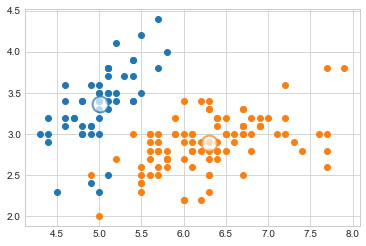

In [21]:
# step 3: visualize!
# (there's no need to import matplotlib: we already imported it above)

# plot the first cluster (the points that have a label 0)
cluster_1 = X[[ label == 0 for label in kmeans.labels_ ]] # get the points in cluster 1 (which have label 0)
_x, _y = cluster_1[:, [ 0 ]], cluster_1[:, [ 1 ]] # x- and y-positions of the items in the first cluster
plt.scatter(_x, _y, color='C0', marker='o') # plot the data from the first cluster
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], # plot the first cluster's centroid
            edgecolor='C0', linewidth=2, color='#FFFFFF', alpha=0.7, marker='o', s=250)

# plot the second cluster (the points that have a label 1)
cluster_2 = X[[ label == 1 for label in kmeans.labels_ ]] # get the points in cluster 1 (which have label 1)
_x, _y = cluster_2[:, [ 0 ]], cluster_2[:, [ 1 ]] # x- and y-positions of the items in the second cluster
plt.scatter(_x, _y, color='C1', marker='o') # plot the data from the second cluster
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], # plot the second cluster's centroid
            edgecolor='C1', linewidth=2, color='#FFFFFF', alpha=0.7, marker='o', s=250)

plt.show() # show the visualization

Even though we don't have labels, we can still make predictions with clustering.
We can use the `predict` function (or `predict_proba`) to guess which cluster a new item belongs to.
The only difference is that this time we don't have a label to verify whether the guess is correct.

In [22]:
kmeans.predict([[ 6, 3, 2.6, 0.1 ]]) # predict the label for a flower that has features 6, 3, 2.6 and 0.1

array([0])

You'll find that sci-kit learn can let you do much more with datasets.
However, the basic formula rarely changes: you load the dataset, fit a model, and then make predictions.
You can learn more about the libraries mentioned in this notebook using the links below.

## Resources

- [scikit-learn's official website, including tutorials, examples and documentation](https://scikit-learn.org/stable/)
- [Learn more about SciPy](https://www.scipy.org/)
- [Introduction to pandas, including tutorials and documentation](https://pandas.pydata.org/)
- [Introduction to NumPy, with tutorials and documentation](https://numpy.org/)
- [Introduction to Matplotlib, with tutorials, example visualizations and documentation](https://matplotlib.org/)